In [1]:
from aitextgen import aitextgen

In [2]:
import chess
import chess.engine
import os
from tqdm import tqdm
import random
import pandas as pd

In [3]:
ai = aitextgen(model_folder="gpt_mixed_model_v1",
               tokenizer_file="gpt_mixed_model_v1/aitextgen.tokenizer.json",
               to_gpu=True)

In [4]:
engine = chess.engine.SimpleEngine.popen_uci('stockfish_14.1_win_x64_avx2/stockfish_14.1_win_x64_avx2.exe')

In [6]:
prompted = pd.read_csv('constrained_mixed_chess.csv').sample(1_000, random_state = 0).T.values.flatten().tolist()
general = pd.read_csv('unconstrained_mixed_chess.csv').sample(1_000, random_state = 0).T.values.flatten().tolist()

prompted = pd.DataFrame(pd.read_csv('prompted_chess.csv').T.values.flatten().tolist()).sample(1_000, random_state = 0).values.flatten().tolist()
general = pd.DataFrame(pd.read_csv('general_chess.csv').T.values.flatten().tolist()).sample(1_000, random_state = 0).values.flatten().tolist()

In [12]:
all_scores = []

for game in tqdm(general):
    board = chess.Board()
    scores = []
    
    try:
        game.split(' ')
    except:
        continue

    for i, move in enumerate(game.split(' ')):
        try:
            move = board.parse_san(move)
        except:
            #legal_moves = list(board.legal_moves)
            #random.shuffle(legal_moves)
            #move = legal_moves[0]
            result = engine.play(board, chess.engine.Limit(time=0.0001))
            move = result.move
            
        if move is None:
            break

        info = engine.analyse(board, chess.engine.Limit(time=0.01), root_moves=[move])

        try:
            t = int(info['score'].white().score())
        except:
            t = str(info['score'].white())
            if t.startswith('#+'):
                t = 10
            elif t.startswith('#-'):
                t = -10
            else:
                assert False, 'Wrong score generated'
        scores.append(t/100)

        board.push(move)
        
    all_scores += [scores]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [35:55<00:00,  2.16s/it]


In [13]:
import numpy as np
import matplotlib.pylab as plt

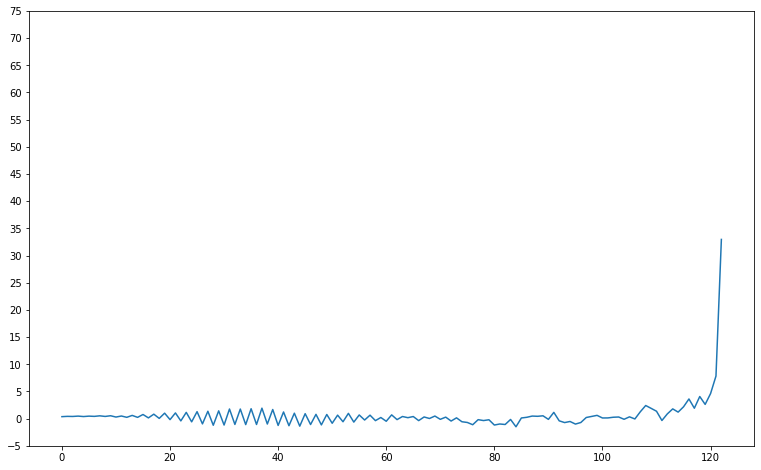

In [14]:
pd.DataFrame(all_scores).mean().plot(figsize = (13, 8))
plt.yticks(range(-5,80,5));

In [15]:
pd.DataFrame(all_scores).mean().describe()

count    123.000000
mean       0.643617
std        3.201858
min       -1.500492
25%       -0.389598
50%        0.295973
75%        0.843099
max       32.965000
dtype: float64

pd.DataFrame(all_scores).to_csv('baseline_stockfish_scores.csv', index = False)

# Read Scores

In [ ]:
import pandas as pd
df = pd.read_csv('gpt_general_stockfish_scores.csv')
df.mean().plot(figsize = (13, 8))
plt.yticks(range(-5,80,5), range(-5,80,5))
plt.show()

In [ ]:
df = pd.read_csv('baseline_stockfish_scores.csv')
df.mean().plot(figsize = (13, 8))
plt.yticks(range(-10,20,2))
plt.show()

In [ ]:
plt.xticks?